# Part 2: Linear Regression


In this part, we will be working with a dataset scraped by [Shubham Maurya](https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data), which collects facts about players in the English Premier League as of 2017. His original goal was to establish if there was a relationship between a player's popularity and his market value, as estimated by transfermrkt.com.

**Your goal is to fit a model able to predict a player's market value.**

## The dataset

The dataset contains the following information:
| **Field**   |     **Description**      |  
|-------------|-------------|
| name   |  Name of the player |
| club   |  Club of the player |
| age    | Age of the player |
|position| The usual position on the pitch
|position_cat| 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers|
|market_value| As on transfermrkt.com on July 20th, 2017|
|page_views| Average daily Wikipedia page views from September 1, 2016 to May 1, 2017|
|fpl_value| Value in Fantasy Premier League as on July 20th, 2017|
|fpl_sel| % of FPL players who have selected that player in their team|
|fpl_points| FPL points accumulated over the previous season|
|region| 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World|
|nationality| Player's nationality|
|new_foreign| Whether a new signing from a different league, for 2017/18 (till 20th July)|
|age_cat| a categorical version of the Age feature|
|club_id| a numerical version of the Club feature|
|big_club| Whether one of the Top 6 clubs|
|new_signing| Whether a new signing for 2017/18 (till 20th July)|

## Exercise 1: Exploring the data
The first step you need to do is to explore your data.

We will start wil the necessary imports. In this exercise, we will be working with the library `pandas`. If you are not familiar with it, it is recommended that you follow the introductory exercises that can be found in the course's github repository.

In [1]:
import numpy as np
import pandas as pd

We will now proceed to read the dataset:

In [2]:
league_df = pd.read_csv('data/football_data.csv') #Reads a CSV file

### Task 1.1: Using pandas for data exploration
Use the method `name_dataframe.head(N)` (N is the number of entries) to look at the first instances of the dataframe. 

Then, use the method `name_dataframe.describe(include='all')` to generate descriptive statistics that summarize each field of the dataframe. 

Finally, print the result of `name_dataframe.dtypes`, in this way you print out the data types associated to each of the fields in the table 

In [3]:
#Your code for head
league_df.head(10)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0
5,Hector Bellerin,Arsenal,22,RB,3,30.0,1675,6.0,13.70%,119,2.0,Spain,0,2,1,1,0
6,Olivier Giroud,Arsenal,30,CF,1,22.0,2230,8.5,2.50%,116,2.0,France,0,4,1,1,0
7,Nacho Monreal,Arsenal,31,LB,3,13.0,555,5.5,4.70%,115,2.0,Spain,0,4,1,1,0
8,Shkodran Mustafi,Arsenal,25,CB,3,30.0,1877,5.5,4.00%,90,2.0,Germany,0,3,1,1,1
9,Alex Iwobi,Arsenal,21,LW,1,10.0,1812,5.5,1.00%,89,4.0,Nigeria,0,1,1,1,0


In [4]:
#Your code for describe
league_df.describe(include='all')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
count,461,461,461.000000,461,461.000000,461.000000,461.000000,461.000000,461,461.000000,460.000000,461,461.000000,461.000000,461.000000,461.000000,461.000000
unique,461,20,NaN,13,NaN,NaN,NaN,NaN,113,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN
top,Alexis Sanchez,Arsenal,NaN,CB,NaN,NaN,NaN,NaN,0.10%,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN
freq,1,28,NaN,85,NaN,NaN,NaN,NaN,64,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.804772,NaN,2.180043,11.012039,763.776573,5.447939,NaN,57.314534,1.993478,NaN,0.034707,3.206074,10.334056,0.303688,0.145336
std,NaN,NaN,3.961892,NaN,1.000061,12.257403,931.805757,1.346695,NaN,53.113811,0.957689,NaN,0.183236,1.279795,5.726475,0.460349,0.352822
min,NaN,NaN,17.000000,NaN,1.000000,0.050000,3.000000,4.000000,NaN,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,24.000000,NaN,1.000000,3.000000,220.000000,4.500000,NaN,5.000000,1.000000,NaN,0.000000,2.000000,6.000000,0.000000,0.000000
50%,NaN,NaN,27.000000,NaN,2.000000,7.000000,460.000000,5.000000,NaN,51.000000,2.000000,NaN,0.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,NaN,30.000000,NaN,3.000000,15.000000,896.000000,5.500000,NaN,94.000000,2.000000,NaN,0.000000,4.000000,15.000000,1.000000,0.000000


In [5]:
#Your code for d_type
league_df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

### Question set 1.1: About the data
1. What is the name of the appearing in the 7th record of the dataset? Olivier Giroud
2. What is the mean age in the English Premier League (in 2017)? 26.804772
3. What fields store a continuous value? market_value, fpl_value

Your answers here:
1. Olivier Giroud
2. 26.804772
3. age, position_cat, market_value, page_views, fpl_value, fpl_points, region, new_foreign, age_cat, club_id, big_club, new_signing


## Exercise 2: Data splits, data preparation and training
Before starting the training procedure, we need to split the data into the training, validation and test sets.

In this exercise, the data will be already given split for you. 

In [6]:
#Loading the splits
df_train = pd.read_csv('data/league_train.csv')
df_val = pd.read_csv('data/league_val.csv')
df_test = pd.read_csv('data/league_test.csv')

Alternatively, for the type of data used in this exercise, the library `scikit-learn` contains the function `train_test_split` that allows to automatically split the data.

### Question set 2.1 Train_test_split
Look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) of the `train_test_split` function:
1. What parameters it receives as input? Provide examples illustrating.
2. What is the role of the parameter shuffle?
3. What is the role of the parameter test_size?
4. The function does not generate a validation set. What would you do to obtain the desired data splits (train, validation and test)? Answer using pseudo-code (Bonus: Write the code for it so that it can run using some dummy generated data). 

Your answers here:
1. The parameters are:
- The data to be split (that can be also more than one array, as we do for example in the next examples by passing both samples and labels), 
- `Test_size` parameter, if float should be between 0.0 and 1.0, and represents the portion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
- `Train_size` parameter, same as test_size but regarding the train set.
- `Random_state` parameter, that controls the shuffling before splitting, and can be set to reproduce the same output across multiple calls
- `Shuffle` parameter, that controls if the data should be shuffled before splitting
- `Stratify` parameter, that controls if the data should be split in a stratified fashion, using this parameter as labels.
2. See the answer to question 1
3. See the answer to question 1
4. We can use this function twice, first to split the data into train and test, and then to split the previously obtained train data into train and validation.
Bonus:


In [7]:
#Examples for question 1:
# for the stratify parameter we created an example here, the first two doesn't use that parameter but we just show the difference between "shuffle=true" and "shuffle=false", while in the third example we set stratify to true which means that each of the two obtained sets contain the same % of samples of each class as the original set.
from sklearn.model_selection import train_test_split
import numpy as np
data=np.arange(12)
labels=np.array([0,0,0,0,1,1,1,1,1,1,1,1])
X_train,X_test,y_train,y_test=train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True, stratify=None)
print("first",)
print("x_train",X_train,"x_test",X_test)
print("y_train",y_train,"y_test",y_test)
X_train, X_test, y_train, y_test=train_test_split(data, labels, test_size=0.5, random_state=42, shuffle=False, stratify=None)
print("Second")
print("x_train",X_train,"x_test",X_test)
print("y_train",y_train,"y_test",y_test)
X_train, X_test, y_train, y_test=train_test_split(data, labels, test_size=0.5, random_state=42, shuffle=True, stratify=labels)
print("Third")
print("x_train",X_train,"x_test",X_test)
print("y_train",y_train,"y_test",y_test)# we start with a 12 elements array with 8 "1" and 4 "0" and it is split with 2 sets of 6 elements (0.5) each one with 4 "1" and 2 "0" (stratify on the label)
# BONUS:
print("BONUS")
from sklearn.model_selection import train_test_split
import numpy as np
data=np.arange(10)
labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
X, X_test, y_train, y_test=train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation =train_test_split(X, y_train, test_size=0.25, random_state=42)
print("X_train", X_train, "X_test", X_test, "X_validation", X_validation)
print("y_train", y_train, "y_test", y_test, "y_validation", y_validation)

first
x_train [ 8  5  2  1 11  4  7  3  6] x_test [10  9  0]
y_train [1 1 0 0 1 1 1 0 1] y_test [1 1 0]
Second
x_train [0 1 2 3 4 5] x_test [ 6  7  8  9 10 11]
y_train [0 0 0 0 1 1] y_test [1 1 1 1 1 1]
Third
x_train [ 1  3 11  4  7  9] x_test [ 0  5  6 10  2  8]
y_train [0 0 1 1 1 1] y_test [0 1 1 1 0 1]
BONUS
X_train [5 6 7 9 2 3] X_test [8 1] X_validation [0 4]
y_train [1 1 1 1 0 0] y_test [1 0] y_validation [0 0]


The dataset contains a lot of features that can be used to build the model. We will start by using `age, fpl_value, big_club` and `page_views`.

$$\hat{y} = w_0 + w_1 x_{age} + w_2 x_{fplavalue} + w_3 x_{bigclub} + w_4(x_{pageviews})^{1/2}$$

Before training the model, we need to prepare the data so that it can be used for training, validation and testing. The following steps need to be executed to prepare the data:

1. Apply the np.sqrt( ) on the values of page_views
2. Transform our variable in numpy array np.array(variable)
3. Add a columns of ones to the matrix $\mathbf{X}$  so it can handle the parameter $w_0$.

### Task 2.1 Prepare data
Complete the function `prepare_data(DataFrame)` where indicated so that all the steps listed above are performed.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    '''
        INPUT :
        - df : a pandas DataFrame

         OUTPUT :
        - variable_array : The processed array
    ''' 
    #We obtain a copy of the relevalnt fields from the DataFrame. This avoids modifying the dataframe directly. Instead, we work in a copy. Notice that we are not copying pageviews field
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    
    #Step 1.  Apply the np.sqrt( ) on the values of page_views
    variable['sqrt_page_views'] = np.sqrt(df['page_views']) # YOUR CODE HERE
    
    # Step 2. Transform our variable in numpy array np.array(variable)
    variable_array = np.array(variable)#YOUR CODE HERE
    
    # Step 3. Add a columns of ones to the matrix 𝐗 so it can handle the parameter 𝑤0.
    # For this purpose we will use the function PolynomialFeatures from scikit-learn
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    return variable_array

### Question set 2.2 PolynomialFeatures function
Investigate the role of the [Polynomial features function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) from scikit-learn. 
1. Why did the order of the polynomial was set to one in the prepare_data function? 
2. Given two features $x_1, x_2$, write down the expression that you would obtain by using the function by setting `degree=2`

Your answer here: 
1) The function generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree, thus if we set the order equal to 1 it will take just all the features (grade=1) and 1 (grade=0) and will return the matrix.
2) y=$w_0+w_1x_1+w_2x_2+w_3x_1^2+w_4x_1x_2+w_5x_2^2$

Now, we execute the function to prepare the data.

In [9]:
#We copy the output label
output_df_train=df_train['market_value'].copy()
#We remove the output label from X
input_df_train=df_train.drop(['market_value'],axis=1)

#process is repeated for test and validation
output_df_val=df_val['market_value'].copy()
input_df_val=df_val.drop(['market_value'],axis=1)

output_df_test=df_test['market_value'].copy()
input_df_test=df_test.drop(['market_value'],axis=1)

#We call prepare_data
X_train = prepare_data(input_df_train)
X_val = prepare_data(input_df_val)
X_test = prepare_data(input_df_test)
y_train = np.array(output_df_train)
y_val = np.array(output_df_val)
y_test = np.array(output_df_test)

We will now proceed to train our first model. In this case, we will use a "home made" implementation of linear regression. When dealing with more complex (and real) applications it is best to use the implementation that can be found in scikit-learn. 

We will define a class called my_linear_regression with four methods:
1. `__init__(self)` : Constructor for the object to assign the object its properties
2. `fit(self, X, y)` : Learning step of linear regression.
3. `predict(self, X)` : predicts new labels $\hat{y}$ given an input X
4. `MSE(self,y_pred, y_test)` : Estimates the mean sum of squared errors between a set of predictions and the ground truth. 


### Task 2.2 Mean sum of squared errors
Implement the MSE function in the class below: 

In [10]:
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
        # solves the matrix system equations
    
    def predict(self,x_test) : # method of the object that can be used
        self.y_hat=np.sum(x_test*self.weights,axis=1)
        
        return self.y_hat
    
    def MSE(self,y_pred, y_test) :
        #YOUR CODE HERE
        MSE=np.sum((y_pred-y_test)**2)/len(y_pred)
        #YOUR CODE ENDS HERE
        return MSE

Now we can train our first model. 

In [11]:
model_1=my_linear_regression()
model_1.fit(X_train,y_train)

print(f'The learned model has parameters:\n{model_1.weights}\n')

The learned model has parameters:
[-15.66271385  -0.16641898   4.45892732   6.28285382   0.18420319]


### Question set 2.3: Interpreting the weights
The estimated weights $\mathbf{w}$ (excluding $w_0$) are associated to 'age', 'fpl_value', 'big_club' and 'page_views' (squared root), in that order. 
1. How do you interpret the values of each of these parameters? Based on this information, what can you say about the effect in a player's market value of his: age? number of page views? fpl value?
Those are the weights for which we multiply each of our feature to obtain the prediction, so the higher the weight the more important is the feature in the prediction. So we can say that the big_club is the most important feature, followed by the fpl_value, the age and then the page views. The reason is that when we have 100 pages views and 100 years, we take the square root of the pages and then we multiply it with the weight while the age is multiplied directly with the weight.

2. Which of these features seems to have the largest effect on a player's value? 
The big_club feature seems to have the largest effect on a player's value.

3. How do you interpret the value obtained for $w_0$?
The value of w0 is the value of the prediction when all the features are 0, so it is the offset of the line that represents the model that we use to perform regression. We use it because otherwise we constrain the line to pass through the origin and this is not always the case.

## Exercise 3: Adding categorical features
It is well known that the position where a football player plays has an impact in his market value. Midfielders and stikers tend to be more expensive. Your goal now is to include this information in the model.

As seen from the description, the player position is encoded as a numeric variable (1, 2, 3, 4). However, they represent categories and not values on their own. Categorical variables are commonly encoded under a scheme denoted 1-of-K encoding. This allows to convert a variable representing K different categories into K different binary values. Example:

| **attacker**   |  **midfielder**      |  **defender** | **goalkeeper** |
|-------------|-------------|-------------|-------------|
| 1 | 0 | 0 | 0|
| 0 | 1 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 | 

### Question 3.1: Adding the position to the model
Write down the expression of the model if you consider the position of the player using 1-of-K encoding.

Your answer here:
given the 1-K= (attacker,midfielder,defender,goalkeeper)
we can obtain the weight as: y=w0+w1*x1+w2*x2+w3*x3+w4*x4+w5*x5 where x5 is the 1-k encoding and w5 is an array that contains the weight of each possible categorical value (attacker, midfielder, defender, goalkeeper)

### Task 3.1 Preparing data with position features
We need to modify the data preparation function so that it now includes the categorical features. For this matter, we have implemented the function `prepare_data_with_position(df)`. It contains the same functionality as the function `prepare_data(df)` and it adds the generation of the 1-of-K encoding. 

Complete the missing code in the function.

In [12]:
def prepare_data_with_position(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df['page_views']) #YOUR CODE HERE
    
    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')) # get_dummies to create 1-of-K encoding, join to add the new columns
    variable_array = np.array(variable) # YOUR CODE HERE
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    return variable_array

### Question 3.2 The get_dummies function
Explain what the following line of code is doing:

`variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos'))`

This line of code creates, given a categorical feature, a vector with N binary values, where N is the cardinality of the feature. Than the join operator adds it to the dataframe. The prefix parameter is used to add a prefix to the name of the new columns. (so for example if we have a and b as possible values for a feature, we will obtain 2 columns called: prefix_a and prefix_b)

### Task 3.2 Train the new model
Your task now is to train the new model. For this you will need to execute the following steps: 
1. Prepare all your data (train, validation and testing). 
2. Create a new `my_linear_regression` object and store it in a variable named `model_2`
3. Run the learning process
4. For inspection purposes, print out the obtained weights.

**Important:** While preparing the data, make sure you do not override the previous data used for model_1

In [13]:
#Your code here
train=pd.read_csv("data/league_train.csv")
val=pd.read_csv("data/league_val.csv")
test=pd.read_csv("data/league_test.csv")
X_train_with_pos=prepare_data_with_position(train.drop(['market_value'],axis=1))
X_val_with_pos=prepare_data_with_position(val.drop(['market_value'],axis=1))
X_test_with_pos=prepare_data_with_position(test.drop(['market_value'],axis=1))
y_train_with_pos=np.array(train["market_value"])
y_val_with_pos=np.array(val["market_value"])
y_test_with_pos=np.array(test["market_value"])

model_2=my_linear_regression()
model_2.fit(X_train_with_pos,y_train_with_pos)
print(f'model_2 has parameters:\n{model_2.weights}\n')

model_2 has parameters:
[ 3.03050530e+02 -2.32675167e-01  5.55326834e+00  4.67947211e+00
  1.83379660e-01 -3.25572674e+02 -3.20712855e+02 -3.20380291e+02
 -3.21519942e+02]


### Question 3.3 Value of the position
Based on the obtained weights, does it seem as if the position of the player has an important role in his market value?

Your answer here:
Yes, the position has a big impact on the value (the weights are very high)

## Exercise 4: Choosing a model
We will now use the validation set to choose between the two models we have built so far. 

### Task 4.1 MSE estimation
Using the validation data, estimate the MSE for each of the two models that you have built so far. For this you will need to: 
1. Predict labels for the validation set using each of the trained models.
2. Call the MSE function from any of the two models (it is equivalent).

In [14]:
#------------YOUR CODE HERE ------------
y_pred_1=model_1.predict(X_val)
y_pred_2=model_2.predict(X_val_with_pos)
mse_1=model_1.MSE(y_pred_1,y_val)
mse_2=model_2.MSE(y_pred_2,y_val_with_pos)
#------------ YOUR CODE ENDS HERE ---------

print(f'MSE model 1 :\n{mse_1}\n')
print(f'MSE model 2 :\n{mse_2}\n')

MSE model 1 :
71.48818413976554

MSE model 2 :
61.93147668530663


### Question set 4.1 Analysis
1. Based on the obtained results, which model would you choose?
Based on the obtained MSE we'd choose the second model
2. Is the position feature useful to improve the model? 
Yes, based on the MSE obtained the second model is better than the first one. (the MSE is lower)

## Exercise 5: Model testing
Use the test dataset to evaluate the generalization capabilities of the **model you chose** in the previous step. For this you need to:
1. Predict the labels of the test set
2. Estimate the MSE. Please note that other metrics, such as the RSS, could be used as well.

In [15]:
#------------YOUR CODE HERE ------------
Y_pred_test_with_pos=model_2.predict(X_test_with_pos)
mse=model_2.MSE(Y_pred_test_with_pos,y_test_with_pos)
#------------ YOUR CODE ENDS HERE ---------

print(f'MSE test:\n{mse}\n')

MSE test:
34.4437590780985


### Question 5.1 Analysis
Based on the previous result, what can you say about your model? Do you consider it makes sufficiently accurate predictions? Feel free to implement other metrics if you consider you need further information. Examples: RSS, Root Mean Squared Error or Mean Absolute Error. 

Your answer here:
We resort to RMSE and MAE, that may be more helpful since they give us results in the measure unit of the target prediction, rather than the squared value as MSE does.
In particular MAE, differently from RMSE, gives the same weight to every error, while RMSE gives more weight to bigger differences (since the difference is squared).
We also try to define a baseline model that we will use to confront the results obtained on our model, to see if our model has "skill". We thus consider a naive model which predicts always the mean of our training labels. We can see that our model behaves way better than the naive one, thus we can say that it has potential.
Given the MSE, the graph below and the MAE_perc we'd say that y_pred is similar to y_test, so the model is not very good. The average error on y is 34% if we use a mean absolute percentage error.

RSS 3203.269594263161
RMSE 5.868880564306834
RMSE_naive 12.983815451017044
MAE 4.332658199943267
MAE_naive 9.996286649302077
MAE_perc 34.23571201790423
MAE_perc_naive 78.98845816603026


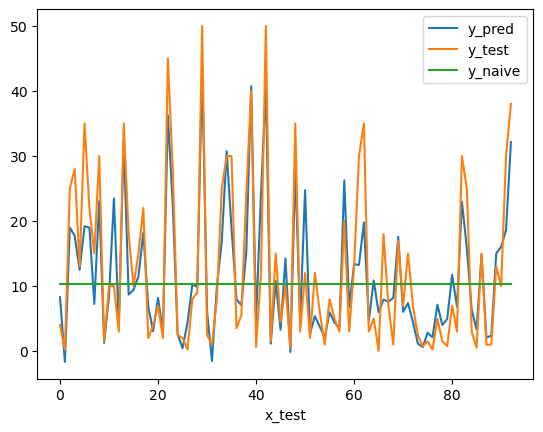

In [16]:
y_naive = np.ones(y_test_with_pos.shape[0])*y_train_with_pos.mean()
values=pd.DataFrame({"x_test":np.arange(0,X_test_with_pos.shape[0],1),"y_pred":Y_pred_test_with_pos,"y_test":y_test_with_pos,"y_naive":y_naive})
values.plot(x="x_test",y=["y_pred","y_test","y_naive"],kind="line")
# RSS
RSS=np.sum((Y_pred_test_with_pos-y_test_with_pos)**2)
print("RSS",RSS)
RMSE=np.sqrt(RSS/len(y_test_with_pos)) # is also equal to sqrt of MSE
RMSE_naive = np.sqrt(np.sum((y_naive-y_test_with_pos)**2)/len(y_test_with_pos))
print("RMSE",RMSE)
print("RMSE_naive",RMSE_naive)
MAE=np.sum(abs(Y_pred_test_with_pos-y_test_with_pos))/len(y_test_with_pos)
MAE_naive = np.sum(abs(y_naive-y_test_with_pos))/len(y_test_with_pos)
print("MAE",MAE)
print("MAE_naive",MAE_naive)
MAE_perc=np.sum(abs(Y_pred_test_with_pos-y_test_with_pos))/y_test_with_pos.sum()
MAE_perc_naive = np.sum(abs(y_naive-y_test_with_pos))/y_test_with_pos.sum()
print("MAE_perc",MAE_perc*100)
print("MAE_perc_naive",MAE_perc_naive*100)